## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [3]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Prepare independent and dependent variables

In [4]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

### Create Column Transformer 

In [5]:
num_feature=[feature for feature in X.columns if X[feature].dtype!='O']
cat_feature=[feature for feature in X.columns if X[feature].dtype=='O']

print(f"Numerical Features are {num_feature}")
print(f"Categorical Features are {cat_feature}")

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ("StandardScaler",numeric_transformer,num_feature)
    ]
)

Numerical Features are ['reading_score', 'writing_score']
Categorical Features are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [6]:
X.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score'],
      dtype='object')

In [7]:
X=preprocessor.fit_transform(X)

In [8]:
X.shape

(1000, 19)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [10]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_squre=r2_score(true,predicted)
    return mae,rmse,mse,r2_squre

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for name,model in models.items():
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse,train_mse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse,tese_mse, test_r2 = evaluate_model(y_test, y_test_pred)

    model_list.append(name)
    r2_list.append(test_r2)

    print(f"Model: {name}")
    print("Training Performance:")
    print(f"- RMSE: {train_rmse:.4f} | MAE: {train_mae:.4f} | R2: {train_r2:.4f}")
    print("Test Performance:")
    print(f"- RMSE: {test_rmse:.4f} | MAE: {test_mae:.4f} | R2: {test_r2:.4f}")
    print("=" * 40 + "\n")


Model: Linear Regression
Training Performance:
- RMSE: 5.3231 | MAE: 4.2667 | R2: 0.8743
Test Performance:
- RMSE: 5.3940 | MAE: 4.2148 | R2: 0.8804

Model: Lasso
Training Performance:
- RMSE: 6.5938 | MAE: 5.2063 | R2: 0.8071
Test Performance:
- RMSE: 6.5197 | MAE: 5.1579 | R2: 0.8253

Model: Ridge
Training Performance:
- RMSE: 5.3233 | MAE: 4.2650 | R2: 0.8743
Test Performance:
- RMSE: 5.3904 | MAE: 4.2111 | R2: 0.8806

Model: K-Neighbors Regressor
Training Performance:
- RMSE: 5.7077 | MAE: 4.5167 | R2: 0.8555
Test Performance:
- RMSE: 7.2530 | MAE: 5.6210 | R2: 0.7838

Model: Decision Tree
Training Performance:
- RMSE: 0.2795 | MAE: 0.0187 | R2: 0.9997
Test Performance:
- RMSE: 8.2377 | MAE: 6.4400 | R2: 0.7211

Model: Random Forest Regressor
Training Performance:
- RMSE: 2.3372 | MAE: 1.8608 | R2: 0.9758
Test Performance:
- RMSE: 5.9974 | MAE: 4.6198 | R2: 0.8522

Model: XGBRegressor
Training Performance:
- RMSE: 1.0073 | MAE: 0.6875 | R2: 0.9955
Test Performance:
- RMSE: 6.4733 |

### Result

In [12]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852185
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.848529
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.721129


## Linear Regression

In [13]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted')

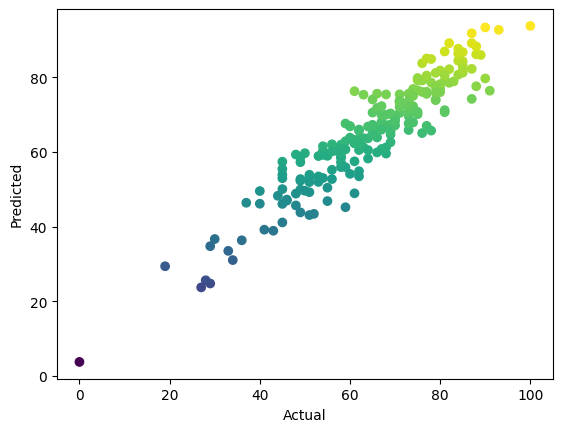

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

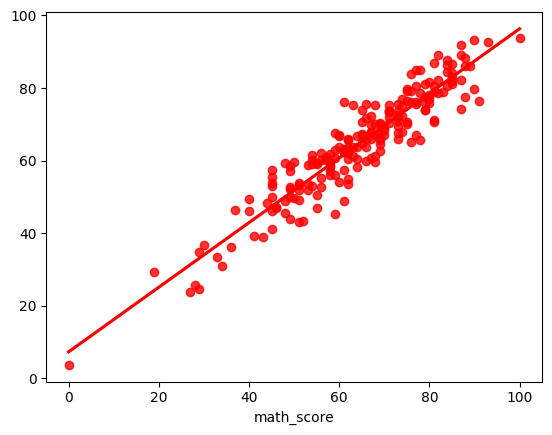

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

#### Difference between Actual and Predicted Values

In [18]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
